In [1]:
from fakahil_mtf_funcs import *
from skimage import io

In [2]:
theta = 3

# Image averaging and background subtraction goes here

In [3]:
#data_dir = '../../data_store/'
data_dir = r'D:\MSci_Project\1_Data'
bg_dir = data_dir + r'\2023-01-17 background images'
img_dir = data_dir + r'\2023-01-17 edge redone'

img_path = img_dir + r'\2023-01-17 edge in water f-a'
imgs =  load_stack(img_path)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-a'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-a'
bg_light = average_stack(load_stack(bg_light_path))
bg_dark = average_stack(load_stack(bg_dark_path))

divided = remove_background(avg_stack, bg_light, bg_dark)

Loaded stack of 125 images, dimensions (300, 300)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


In [4]:
edge = divided[11]

# you absolute tool, you've chosen the out of focus image

# Resume existing code

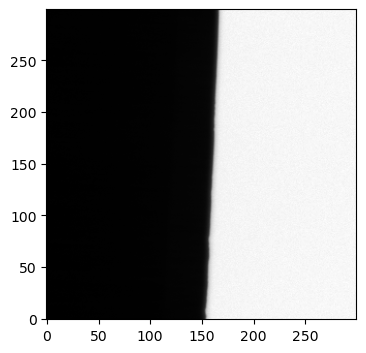

In [5]:
plt.figure(figsize=(4,5))
plt.imshow(edge,origin='lower',cmap='gray')
# plt.plot(x[:,0],y,'rx')

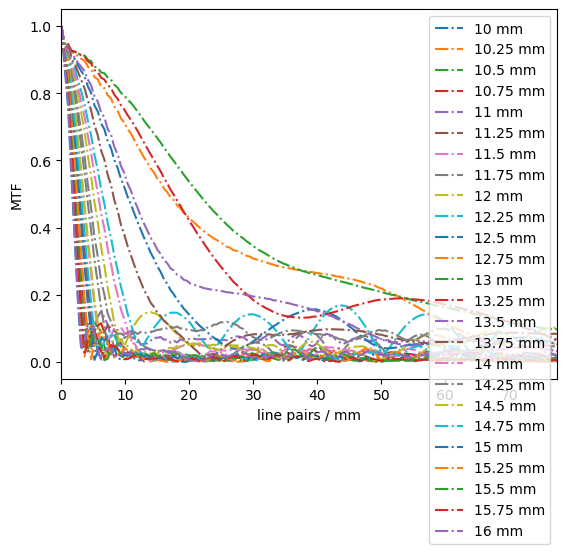

In [6]:
depths = [10, 10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12, 12.25, 12.5, 12.75, 13, 13.25, 13.5, 13.75, 14, 14.25, 14.5, 14.75, 15, 15.25, 15.5, 15.75, 16]

positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

In [7]:
import itertools
all_freqs = list(itertools.chain.from_iterable(frequencies))
all_pos = np.repeat(positions, 300)
all_mtfs = list(itertools.chain.from_iterable(mtfs))

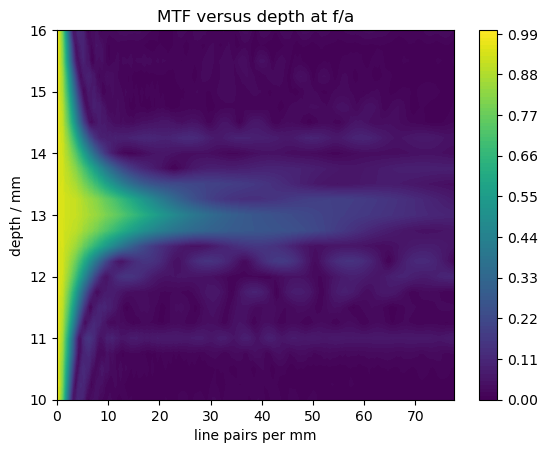

In [8]:
MTF = np.array(all_mtfs).reshape(25, 300)
plt.contourf(frequencies[0], positions, MTF, 100)
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/a')
plt.colorbar()
plt.show()

In [9]:
#data_dir = '../../data_store/'
data_dir = r'D:\MSci_Project\1_Data'
bg_dir = data_dir + r'\2023-01-17 background images'
img_dir = data_dir + r'\2023-01-17 edge redone'

img_path = img_dir + r'\2023-01-17 edge in water f-e'
imgs =  load_stack(img_path)

avg_stack = average_stack(imgs)

bg_light_path = bg_dir + r'\2023-01-17 bg light f-e'
bg_dark_path = bg_dir + r'\2023-01-17 bg dark f-e'
bg_light = average_stack(load_stack(bg_light_path))
bg_dark = average_stack(load_stack(bg_dark_path))

divided = remove_background(avg_stack, bg_light, bg_dark)

Loaded stack of 125 images, dimensions (300, 300)
Averaged original stack of 125 down to 25.
Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.
Loaded stack of 5 images, dimensions (300, 300)
Averaged original stack of 5 down to 1.
Removed background and divided illumination from 25 images.


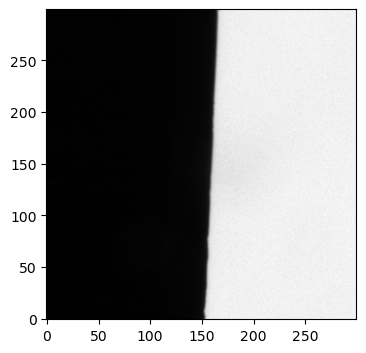

In [10]:
edge = divided[11]
plt.figure(figsize=(4,5))
plt.imshow(edge,origin='lower',cmap='gray')

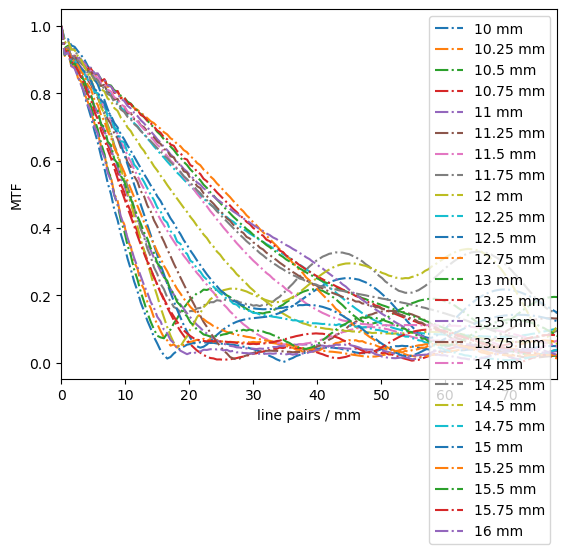

In [11]:
depths = [10, 10.25, 10.5, 10.75, 11, 11.25, 11.5, 11.75, 12, 12.25, 12.5, 12.75, 13, 13.25, 13.5, 13.75, 14, 14.25, 14.5, 14.75, 15, 15.25, 15.5, 15.75, 16]

positions = []
frequencies = []
mtfs = []

for i in np.arange(0, len(divided), 1):
    freqs, mtf = allComputeMTF(divided[i], depths[i], plot=True)
    positions.append(depths[i])
    frequencies.append(freqs)
    mtfs.append(mtf)
    # plt.show()

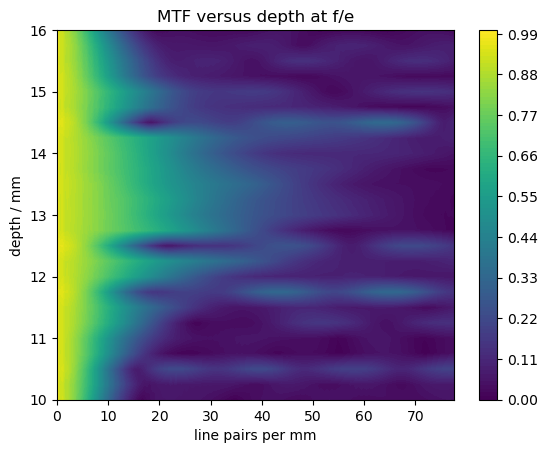

In [12]:
all_mtfs = list(itertools.chain.from_iterable(mtfs))
MTF = np.array(all_mtfs).reshape(25, 300)
plt.contourf(frequencies[0], positions, MTF, 100)
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('MTF versus depth at f/e')
plt.colorbar()
plt.show()

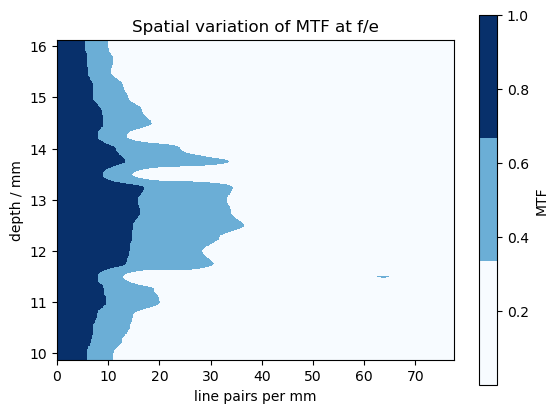

In [28]:
dx = (frequencies[0][1]-frequencies[0][0])/2.
dy = (positions[1]-positions[0])/2.
extent = [frequencies[0][0]-dx, frequencies[0][-1]+dx, positions[0]-dy, positions[-1]+dy]

plt.imshow(MTF, extent=extent, aspect=10, cmap=plt.cm.get_cmap('Blues', 3))
plt.xlim(0,0.5/6.45e-3)
plt.xlabel('line pairs per mm')
plt.ylabel('depth / mm')
plt.title('Spatial variation of MTF at f/e')
cbar = plt.colorbar()
cbar.set_label('MTF')
plt.show()